In [1]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
import numpy as np
from datetime import datetime
from tensorflow.keras import layers   
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input,Dense, Dropout, Concatenate, RepeatVector,Reshape
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from numpy import array,hstack
from tensorflow.keras.optimizers import Adam

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-01-27 14:44:01.972901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/var/folders/fj/g5rgz0_j4wj1zbz0tr6xdmrh0000gn/T/ipykernel_74759/1070053228.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('/Users/tonywu/Desktop/Thesis Code/Replication/fred-database_code/2015-01.csv', parse_dates=['Date'],date_parser=date_parse)


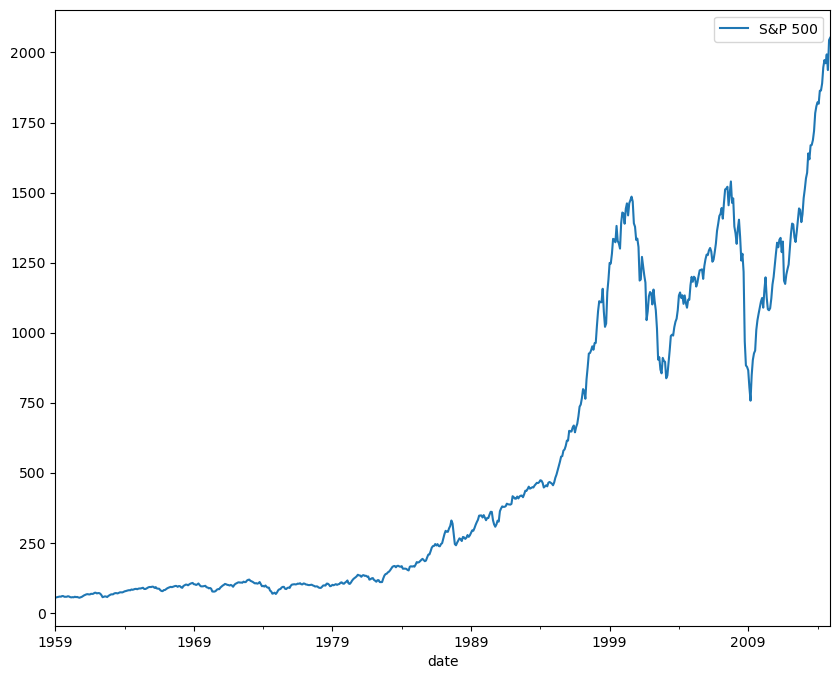

In [2]:
date_parse = lambda x: datetime.strptime(x, '%m/%d/%Y')
df=pd.read_csv('2015-01.csv', parse_dates=['Date'],date_parser=date_parse)  
df.rename(columns={'Date': 'date'}, inplace=True)
df.set_index('date')[['S&P 500']].plot(subplots=True)
plt.savefig('SP500')

In [3]:
date_parse = lambda x: datetime.strptime(x, '%Y%m')
df=pd.read_csv('macro.csv', parse_dates=['date'],date_parser=date_parse)  

/var/folders/fj/g5rgz0_j4wj1zbz0tr6xdmrh0000gn/T/ipykernel_7638/344312718.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('/Users/tonywu/Desktop/Thesis Code/Replication/fred-database_code/macro.csv', parse_dates=['date'],date_parser=date_parse)


In [4]:
df

,date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,spread_mean,suv,dp,ep,bm,ntis,tbl,tms,dfy,svar
0,1962-09-01,0.004394,0.004244,0.003270,-0.005515,0.015717,0.009567,0.009490,0.012658,0.016824,...,0.283478,-0.603707,0.052634,0.055090,0.050846,0.001273,-0.0004,0.0120,-6.938894e-18,0.001177
1,1962-10-01,0.001372,0.000936,0.002822,0.023127,0.006198,0.001060,0.000000,-0.002097,-0.011536,...,-0.107906,-1.092758,0.003564,0.008710,-0.018465,-0.002507,-0.0004,0.0121,6.938894e-18,0.003452
2,1962-11-01,0.000457,0.001139,0.011160,-0.015738,0.002984,0.006321,0.006274,0.004190,0.006309,...,0.164771,-0.388680,-0.088839,-0.083780,-0.096162,-0.003284,0.0009,0.0113,-6.938894e-18,0.001275
3,1962-12-01,0.004897,0.002841,-0.004913,0.019814,0.015582,0.001052,-0.003132,0.001045,-0.002097,...,-0.281812,0.840303,-0.005530,-0.000595,-0.004303,-0.004842,0.0004,0.0108,-3.000000e-04,0.000544
4,1963-01-01,0.004459,0.005657,0.013142,0.010508,0.005206,0.004186,0.006259,0.004172,0.006282,...,0.112512,0.985676,-0.044819,-0.044342,-0.046077,-0.002832,0.0004,0.0107,2.000000e-04,0.000700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,2014-01-01,0.001814,0.002240,0.005150,0.011664,0.000668,0.005500,0.002542,0.002320,0.004283,...,-0.018742,-0.244559,0.047934,0.038392,0.054408,0.001621,-0.0003,0.0338,-6.000000e-04,0.001304
617,2014-02-01,-0.002108,-0.002903,-0.000391,-0.002521,0.005250,0.001796,0.003940,0.004786,0.008730,...,-0.010909,0.165406,-0.030646,-0.040059,-0.038909,0.002811,0.0001,0.0334,-5.000000e-04,0.001254
618,2014-03-01,0.004482,0.004188,-0.002924,-0.012748,-0.012639,-0.002476,-0.005609,-0.007317,-0.009094,...,-0.060738,0.151552,0.004527,-0.004757,0.125823,-0.000160,0.0000,0.0332,3.000000e-04,0.000869
619,2014-04-01,0.005060,0.004918,0.003551,0.005713,0.008496,0.009340,0.013673,0.016501,0.015443,...,-0.008436,-0.154830,0.004370,0.001294,-0.007457,0.000207,-0.0002,0.0323,-2.000000e-04,0.001363


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

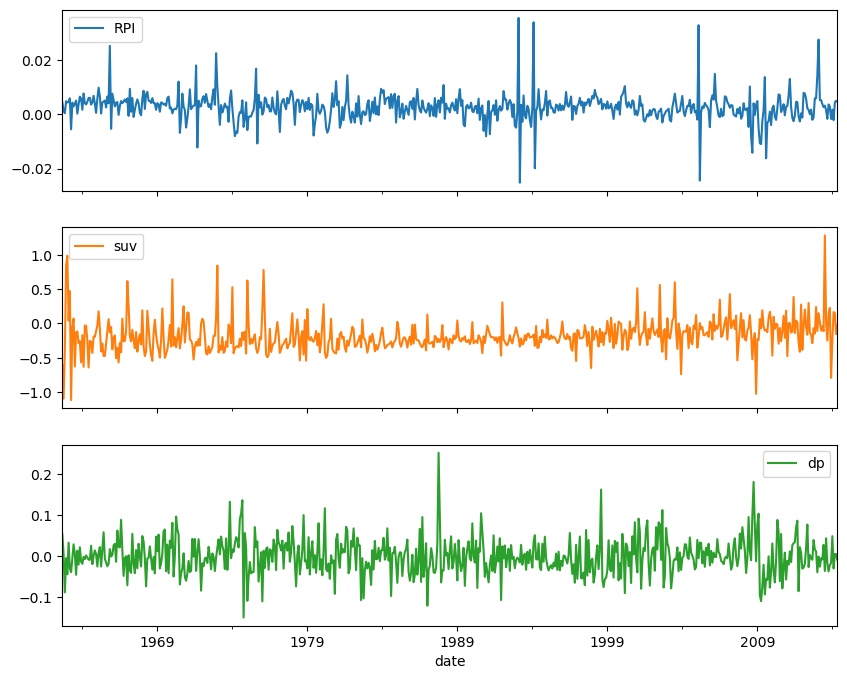

In [6]:
df.set_index('date')[['RPI','suv','dp']].plot(subplots=True)

In [7]:
df_input=df.loc[:, df.columns != 'date'] 

In [8]:
feature_columns = df_input.columns
for i, column in enumerate(feature_columns):
    exec(f"x_{i + 1} = df_input['{column}'].values")
for i in range(len(df_input.columns)):
    exec(f"x_{i+1} = x_{i+1}.reshape((len(x_{i+1}), 1))")
    
print("x_1_shape:", x_1.shape)

x_1_shape: (621, 1)


In [9]:
#Standardization
scaler = StandardScaler()
for i in range(len(df_input.columns)):
    exec(f"scaler=scaler.fit(x_{i+1})")
    exec(f"x_{i+1}_scaled=scaler.transform(x_{i+1})")


In [11]:
num_variables = len(df_input.columns)

variable_list = [globals()[f"x_{i}_scaled"] for i in range(1, num_variables + 1)]

# Stack them horizontally
stacked_data = np.hstack(variable_list)
stacked_data.shape

(621, 178)

In [12]:
train_ind = int(len(stacked_data)-300)
train = stacked_data[:train_ind]
test = stacked_data[train_ind:]
train.shape

(321, 178)

In [13]:
def split_sequence(sequences,n_steps_in,n_steps_out):
    X,y = list(),list()
    for i in range(len(sequences)):
        end_ix=i+n_steps_in
        out_end_ix=end_ix+n_steps_out-1
        if out_end_ix>len(sequences):
            break
        
        seq_x,seq_y=sequences[i:end_ix,:len(df)],sequences[end_ix-1:out_end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)


In [14]:
n_steps_in,n_steps_out= 20,1
X,y = split_sequence(stacked_data ,n_steps_in,n_steps_out)
print ("X.shape",X.shape)
print("y.shape",y.shape)


X.shape (602, 20, 178)
y.shape (602, 1)


In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM,TimeDistributed
import numpy as np
import tensorflow as tf

# Define the input layer
inputs = Input(shape=(n_steps_in, 178))

# LSTM layer

lstm_layer_1, state_h_1, state_c_1 = LSTM(20, recurrent_dropout=0.9, activation='tanh', return_sequences=True, return_state=True, name='LSTM_1')(inputs)
lstm_layer_2, state_h_2, state_c_2 = LSTM(6, recurrent_dropout=0.9, activation='tanh', return_sequences=True, return_state=True, name='LSTM_2')(lstm_layer_1)
output_layer = Dense(4, activation='linear', name='output_layer')(lstm_layer_2)

# Create the model
model = Model(inputs=inputs, outputs=[output_layer, state_h_2, state_c_2])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
# Compile the model

# Display the model summary
model.summary()



[output_layer, state_h_2, state_c_2]=model.predict(X)
# Extract state_h_3 from the states

# Access the hidden states

# Display the shape of the obtained hidden states


selected_dates = df['date'].iloc[n_steps_in-1:n_steps_in + len(y)]
plt.figure(figsize=(15,6))
fig1 = plt.figure("Figure 1",figsize=(15,6))
plt.scatter(selected_dates,state_h_2[:, 0:1],label='macro_1' ,c="blue")
fig2 = plt.figure("Figure 2",figsize=(15,6))
plt.scatter(selected_dates,state_h_2[:, 1:2],label='macro_2' ,c="green")
fig3 = plt.figure("Figure 3",figsize=(15,6))
fig_3=plt.scatter(selected_dates,state_h_2[:, 2:3],label='macro_3',c="red")
fig4 = plt.figure("Figure 4",figsize=(15,6))
fig_4=plt.scatter(selected_dates,state_h_2[:, 3:4],label='macro_4',c="orange")
plt.show()
plt.savefig('books_read.png')

2023-11-28 22:44:47.010244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


NameError: name 'n_steps_in' is not defined

In [141]:
date_new=selected_dates.to_numpy()
hidden_state=pd.DataFrame(state_h_2,columns=['macro_0','macro_1','macro_2','macro_3','macro_4','macro_5'])
date=pd.DataFrame(date_new,columns=['date'])
hs_data= pd.concat([date,hidden_state], axis=1)
hs_data

,date,macro_0,macro_1,macro_2,macro_3,macro_4,macro_5
0,1964-04-01,0.142554,-0.033941,0.211362,-0.192001,-0.133784,0.203079
1,1964-05-01,0.112931,-0.036739,0.217892,-0.215238,-0.113226,0.169350
2,1964-06-01,0.160101,-0.062696,0.252814,-0.163670,-0.202602,0.261135
3,1964-07-01,0.110492,-0.051675,0.231486,-0.194293,-0.217416,0.218873
4,1964-08-01,0.093344,-0.045191,0.286963,-0.222339,-0.223024,0.213539
...,...,...,...,...,...,...,...
597,2014-01-01,-0.281022,0.028039,-0.033236,0.218423,0.033226,-0.208173
598,2014-02-01,-0.278859,0.016153,-0.086175,0.166515,0.068970,-0.237964
599,2014-03-01,-0.257183,0.047366,-0.079360,0.122432,0.087432,-0.224277
600,2014-04-01,-0.306855,0.040591,-0.103712,0.187222,0.044104,-0.299837


In [ ]:
selected_dates

In [ ]:
rec_data = pd.read_csv("USREC.csv")
rec_data["DATE"] = pd.to_datetime(rec_data["DATE"])
start_date = '1963-11-01'
end_date = '2014-05-01'
filtered_df = rec_data[(rec_data['DATE'] >= start_date) & (rec_data['DATE'] <= end_date)]
data_new=filtered_df.to_numpy()
data_R =pd.DataFrame(data_new,columns=['date','Rec'])
data_R

In [144]:
full_data= pd.concat([hs_data,data_R["Rec"]], axis=1)

In [145]:
macro_0=full_data[['date', 'macro_0']]
macro_1=full_data[['date', 'macro_1']]
macro_2=full_data[['date', 'macro_2']]
macro_3=full_data[['date', 'macro_3']]
macro_4=full_data[['date', 'macro_4']]
macro_5=full_data[['date', 'macro_5']]

REC=full_data[['date', 'Rec']]
full_data['Neg_Rec'] = -full_data['Rec']*0.6
full_data['Recessions'] = full_data['Rec']*0.6
n_REC=full_data[['date', 'Neg_Rec']]
p_REC=full_data[['date', 'Recessions']]

full_data.to_csv('macro_factor_16_6_4.csv')

/Users/tonywu/opt/anaconda3/envs/tf/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1608: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


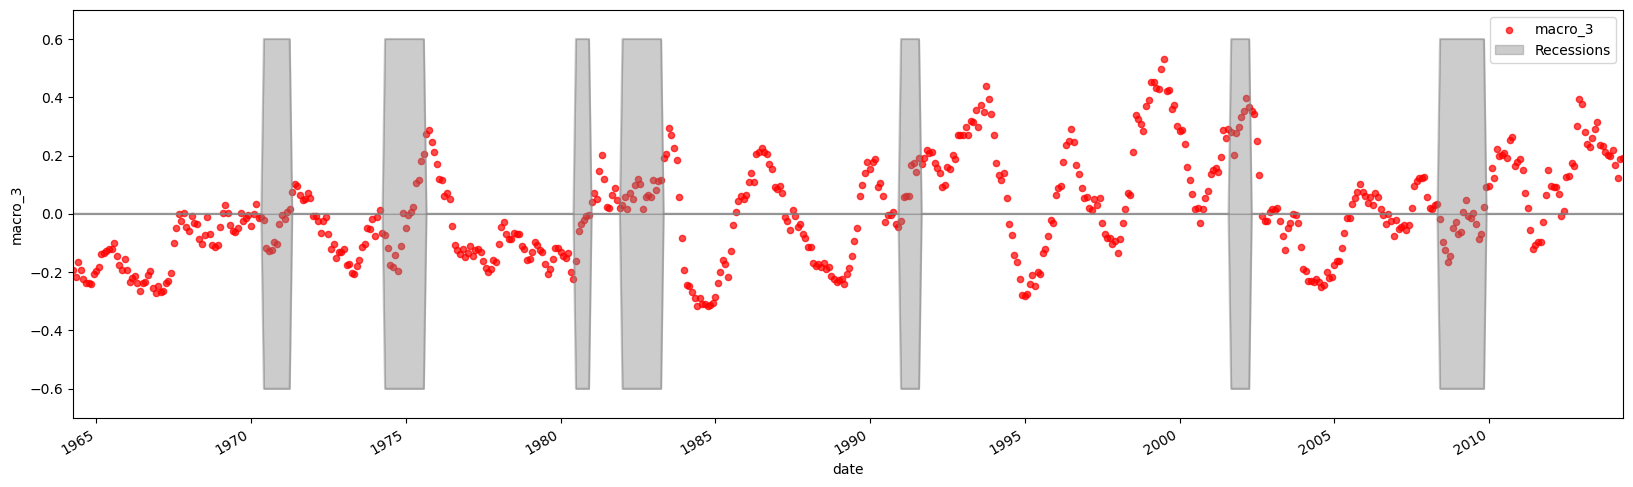

In [146]:

# Assuming you have already imported the necessary libraries and have your datasets loaded

# Convert 'date' columns to datetime format using .loc
macro_3.loc[:, 'date'] = pd.to_datetime(macro_3['date'])
p_REC.loc[:, 'date'] = pd.to_datetime(p_REC['date'])
n_REC.loc[:, 'date'] = pd.to_datetime(n_REC['date'])

fig, ax = plt.subplots(figsize=(20, 6))

# Your scatter plot
A=macro_3.plot.scatter(x='date', y='macro_3', color='red', alpha=0.7, label='macro_3', ax=ax)

# Your first area plot
B=p_REC.plot.area(x='date', alpha=0.4, color="gray", label='Custom Label for n_REC', ax=ax)

# Your second area plot
C=n_REC.plot.area(x='date', alpha=0.4, color="gray",label='Recessions', ax=ax)

first_date = p_REC['date'].min()
last_date = p_REC['date'].max()
plt.xlim(first_date, last_date)

# Set y-axis limits
plt.ylim(-0.7, 0.7)

# Show legend

legend = ax.legend()
legend.get_texts()[1].set_text('Recessions') 
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] if isinstance(h, list) else h for h in handles]
ax.legend(handles=handles[:2], labels=labels[:2])

# Show the plot
plt.savefig('macro_3.png')

/Users/tonywu/opt/anaconda3/envs/tf/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1608: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


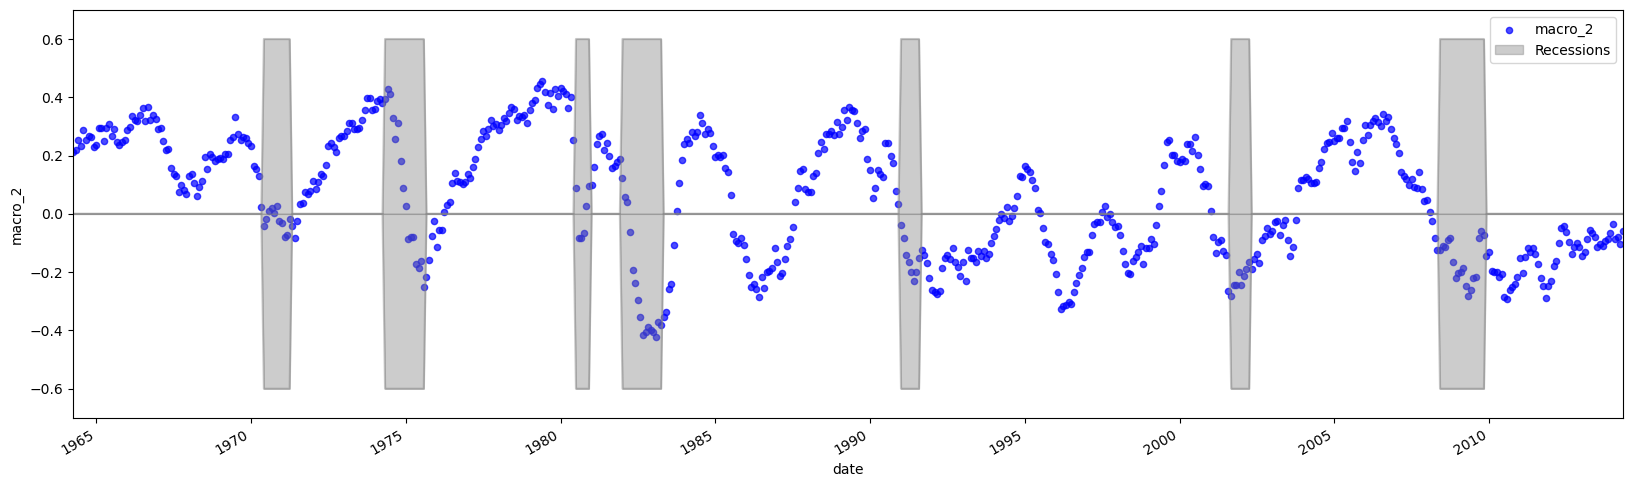

In [147]:

macro_2.loc[:, 'date'] = pd.to_datetime(macro_2['date'])
p_REC.loc[:, 'date'] = pd.to_datetime(p_REC['date'])
n_REC.loc[:, 'date'] = pd.to_datetime(n_REC['date'])

fig, ax = plt.subplots(figsize=(20, 6))

macro_2.plot.scatter(x='date', y='macro_2', color='blue', alpha=0.7, label='macro_2', ax=ax)
p_REC.plot.area(x='date', alpha=0.4, color="gray", label='Custom Label for n_REC', ax=ax)
n_REC.plot.area(x='date', alpha=0.4, color="gray", ax=ax)
first_date = p_REC['date'].min()
last_date = p_REC['date'].max()
plt.xlim(first_date, last_date)

plt.ylim(-0.7, 0.7)



legend = ax.legend()
legend.get_texts()[1].set_text('Recessions') 
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] if isinstance(h, list) else h for h in handles]
ax.legend(handles=handles[:2], labels=labels[:2])


plt.savefig('macro_2.png')

/Users/tonywu/opt/anaconda3/envs/tf/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1608: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


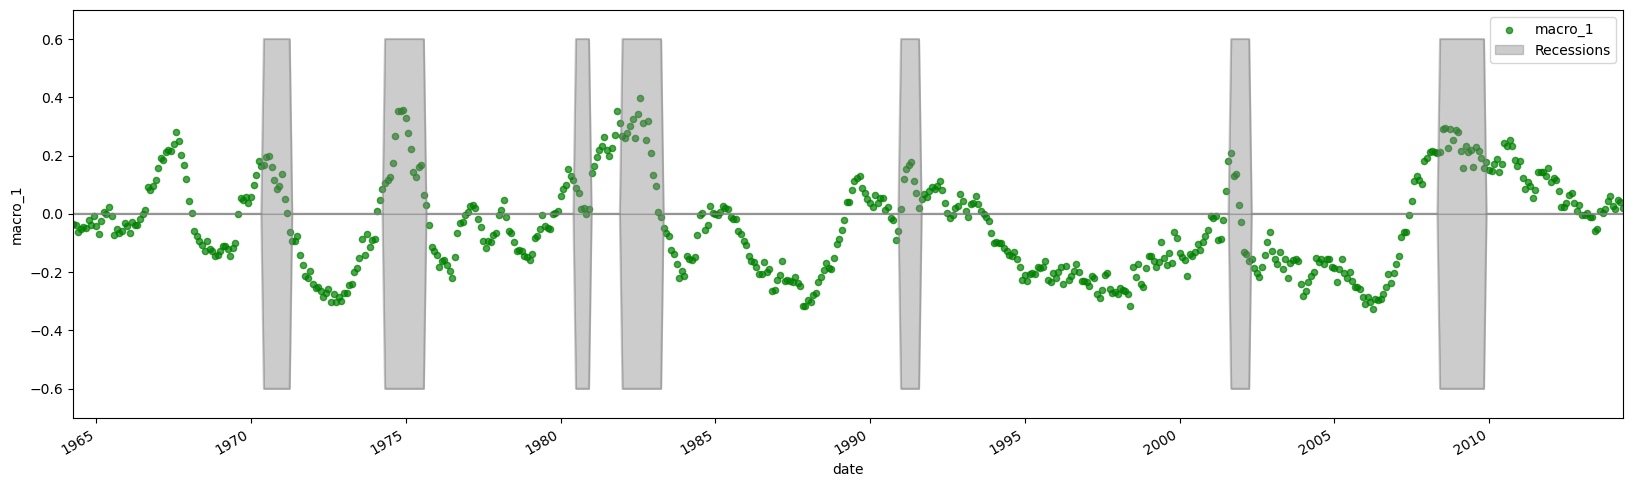

In [148]:

macro_1.loc[:, 'date'] = pd.to_datetime(macro_1['date'])
p_REC.loc[:, 'date'] = pd.to_datetime(p_REC['date'])
n_REC.loc[:, 'date'] = pd.to_datetime(n_REC['date'])

fig, ax = plt.subplots(figsize=(20, 6))

macro_1.plot.scatter(x='date', y='macro_1', color='green', alpha=0.7, label='macro_1', ax=ax)
p_REC.plot.area(x='date', alpha=0.4, color="gray", label='Custom Label for n_REC', ax=ax)
n_REC.plot.area(x='date', alpha=0.4, color="gray", ax=ax)
first_date = p_REC['date'].min()
last_date = p_REC['date'].max()
plt.xlim(first_date, last_date)
plt.ylim(-0.7, 0.7)



legend = ax.legend()
legend.get_texts()[1].set_text('Recessions') 
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] if isinstance(h, list) else h for h in handles]
ax.legend(handles=handles[:2], labels=labels[:2])


plt.savefig('macro_1.png')

/Users/tonywu/opt/anaconda3/envs/tf/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1608: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


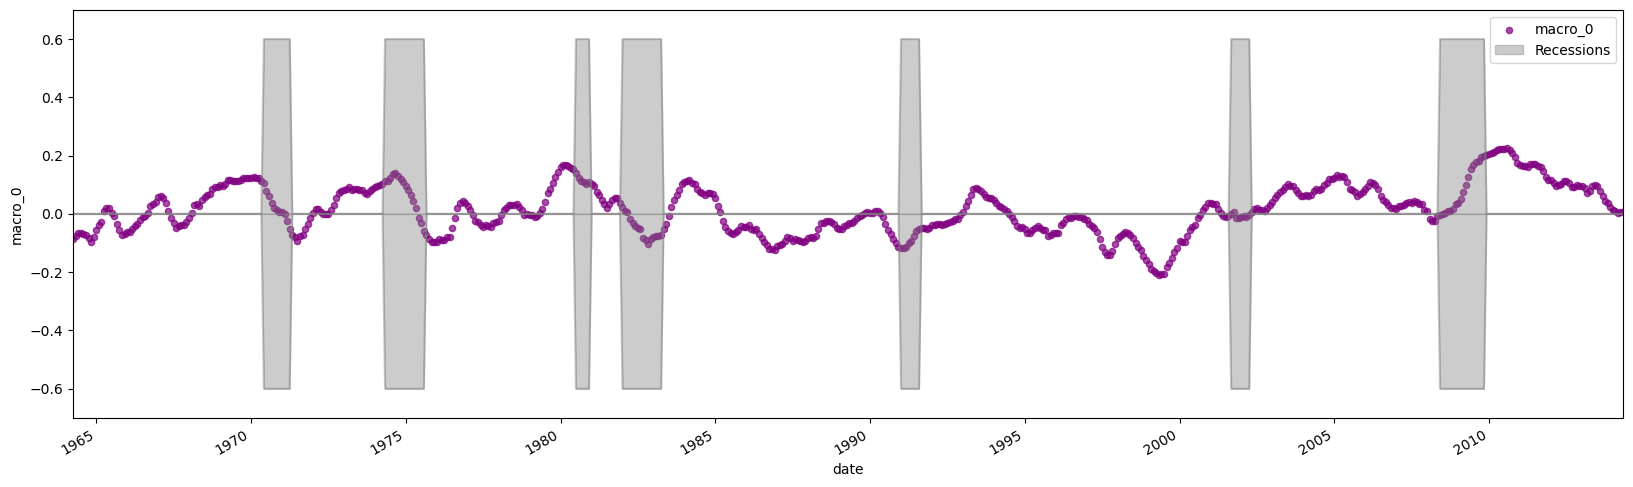

In [134]:
macro_0.loc[:, 'date'] = pd.to_datetime(macro_0['date'])
p_REC.loc[:, 'date'] = pd.to_datetime(p_REC['date'])
n_REC.loc[:, 'date'] = pd.to_datetime(n_REC['date'])

fig, ax = plt.subplots(figsize=(20, 6))

macro_0.plot.scatter(x='date', y='macro_0', color='purple', alpha=0.7, label='macro_0', ax=ax)
p_REC.plot.area(x='date', alpha=0.4, color="gray", label='Custom Label for n_REC', ax=ax)
n_REC.plot.area(x='date', alpha=0.4, color="gray", ax=ax)
first_date = p_REC['date'].min()
last_date = p_REC['date'].max()
plt.xlim(first_date, last_date)
plt.ylim(-0.7, 0.7)

legend = ax.legend()
legend.get_texts()[1].set_text('Recessions') 
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] if isinstance(h, list) else h for h in handles]
ax.legend(handles=handles[:2], labels=labels[:2])


plt.savefig('macro_0.png')

/Users/tonywu/opt/anaconda3/envs/tf/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1608: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


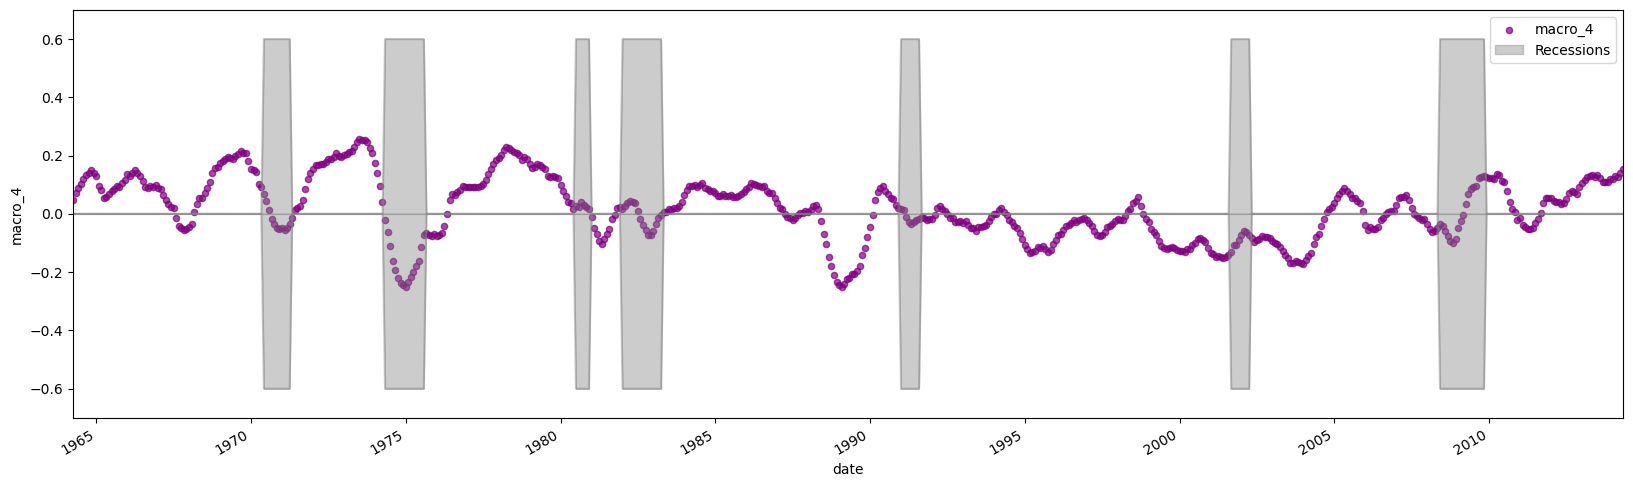

In [135]:
macro_4.loc[:, 'date'] = pd.to_datetime(macro_4['date'])
p_REC.loc[:, 'date'] = pd.to_datetime(p_REC['date'])
n_REC.loc[:, 'date'] = pd.to_datetime(n_REC['date'])

fig, ax = plt.subplots(figsize=(20, 6))

macro_4.plot.scatter(x='date', y='macro_4', color='purple', alpha=0.7, label='macro_4', ax=ax)
p_REC.plot.area(x='date', alpha=0.4, color="gray", label='Custom Label for n_REC', ax=ax)
n_REC.plot.area(x='date', alpha=0.4, color="gray", ax=ax)
first_date = p_REC['date'].min()
last_date = p_REC['date'].max()
plt.xlim(first_date, last_date)
plt.ylim(-0.7, 0.7)

legend = ax.legend()
legend.get_texts()[1].set_text('Recessions') 
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] if isinstance(h, list) else h for h in handles]
ax.legend(handles=handles[:2], labels=labels[:2])


plt.savefig('macro_4.png')

/Users/tonywu/opt/anaconda3/envs/tf/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1608: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


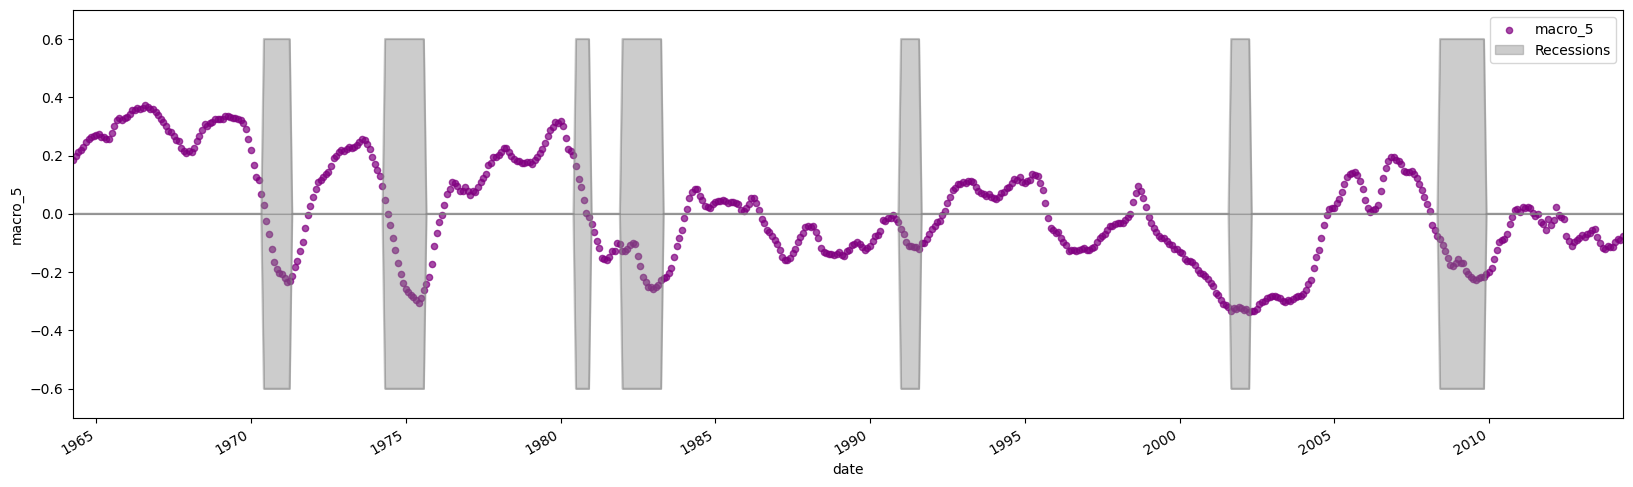

In [136]:
macro_5.loc[:, 'date'] = pd.to_datetime(macro_5['date'])
p_REC.loc[:, 'date'] = pd.to_datetime(p_REC['date'])
n_REC.loc[:, 'date'] = pd.to_datetime(n_REC['date'])

fig, ax = plt.subplots(figsize=(20, 6))

macro_5.plot.scatter(x='date', y='macro_5', color='purple', alpha=0.7, label='macro_5', ax=ax)
p_REC.plot.area(x='date', alpha=0.4, color="gray", label='Custom Label for n_REC', ax=ax)
n_REC.plot.area(x='date', alpha=0.4, color="gray", ax=ax)
first_date = p_REC['date'].min()
last_date = p_REC['date'].max()
plt.xlim(first_date, last_date)
plt.ylim(-0.7, 0.7)

legend = ax.legend()
legend.get_texts()[1].set_text('Recessions') 
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] if isinstance(h, list) else h for h in handles]
ax.legend(handles=handles[:2], labels=labels[:2])


plt.savefig('macro_5.png')